In [1]:
import sys
sys.path.append('../')
import mobipy
import pandas as pd

In [2]:
app = mobipy.Model_Application.build_from_model_and_data_file('../models/models/simplyc_model.txt', 
                                                              '../models/models/data/simplyc_langtjern.dat')

In file ../models/models/data/simplyc_langtjern.dat line 105 column 8:
The model "SimplyC" does not contain a module named "Priestley-Taylor PET". This data block will be ignored.




In [3]:
app.start_date[()] = '1995-1-1'
app.run()

True

<AxesSubplot:xlabel='Date'>

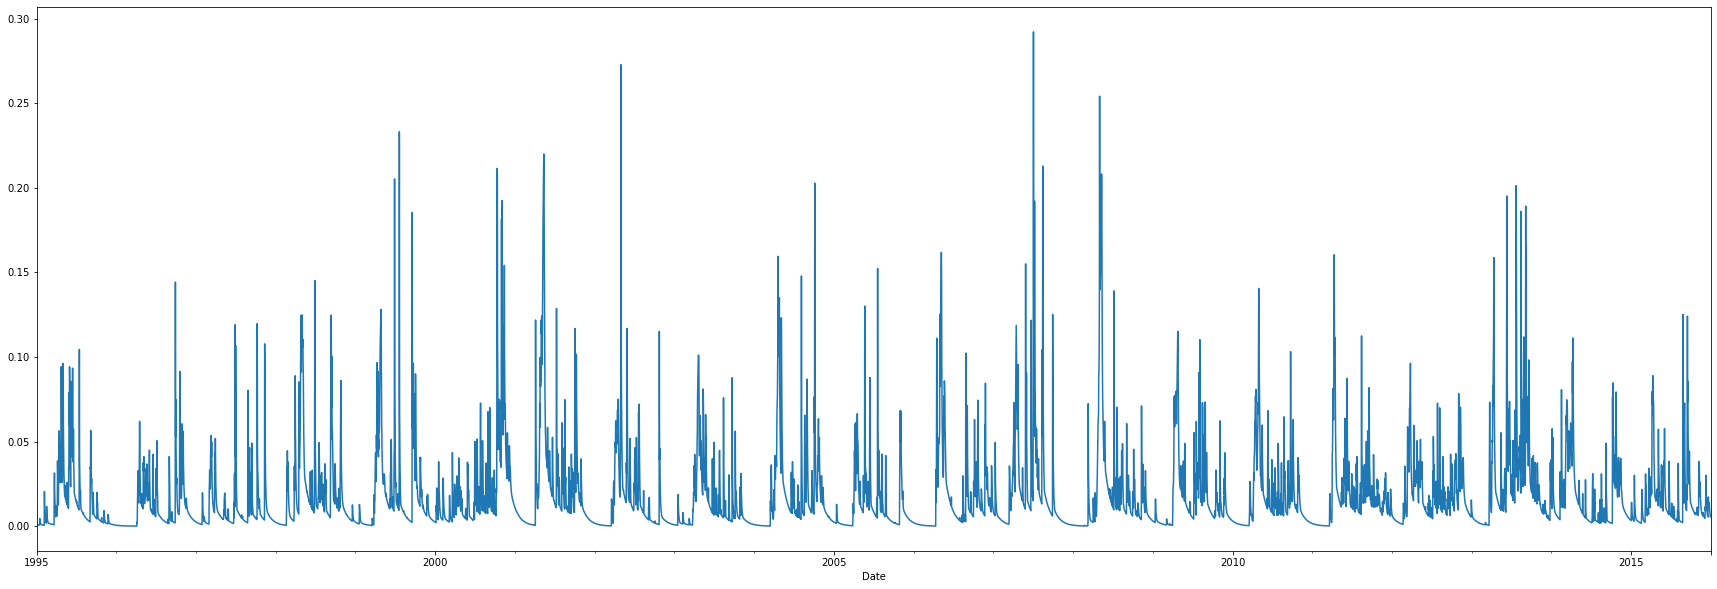

In [4]:
app.river.water.flow['One'].plot(figsize=(30, 10))

In [5]:
sq = app["SimplyQ land"]
sq.bfi[()] = 0.9
sq.tc_g[()] = 100
app.lu_prop["One", "Forest"] = 1

<AxesSubplot:xlabel='Date'>

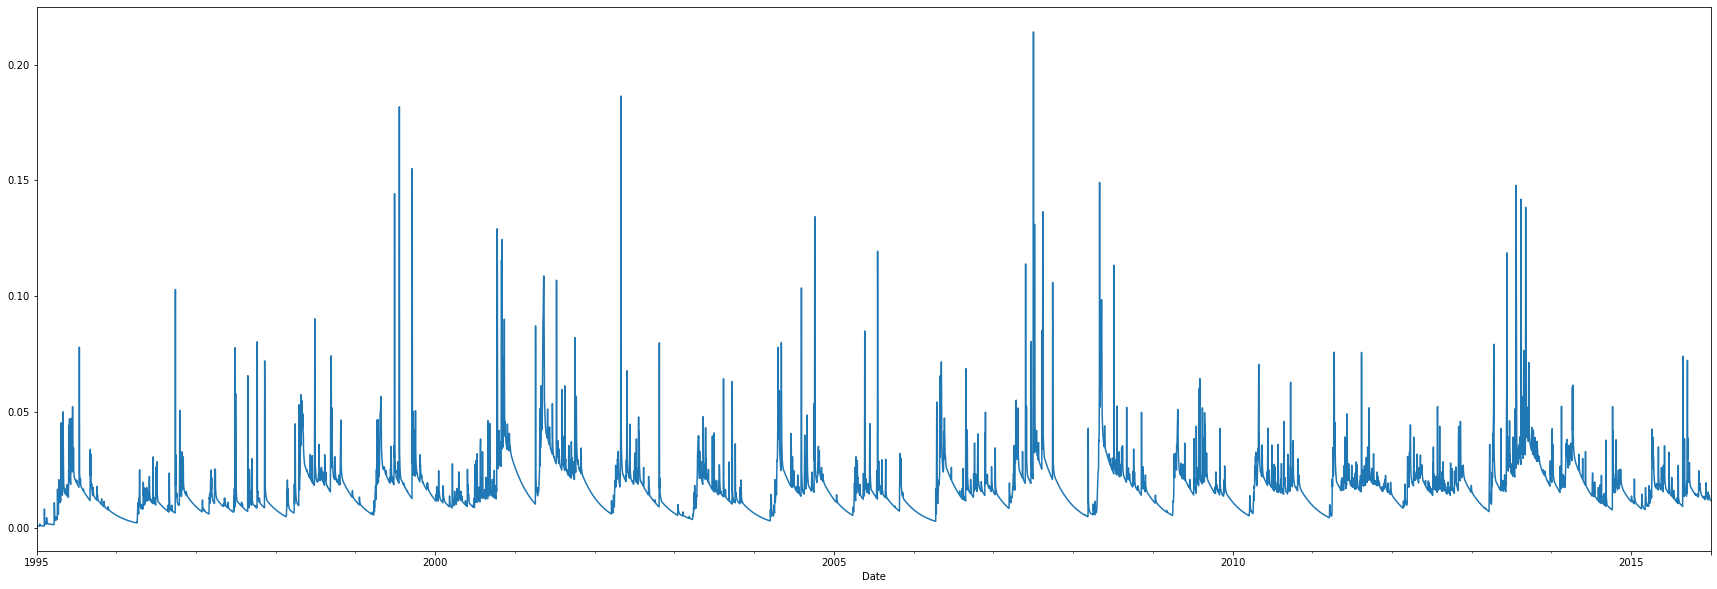

In [6]:
app.run()
app.river.water.flow['One'].plot(figsize=(30, 10))

<AxesSubplot:xlabel='Date'>

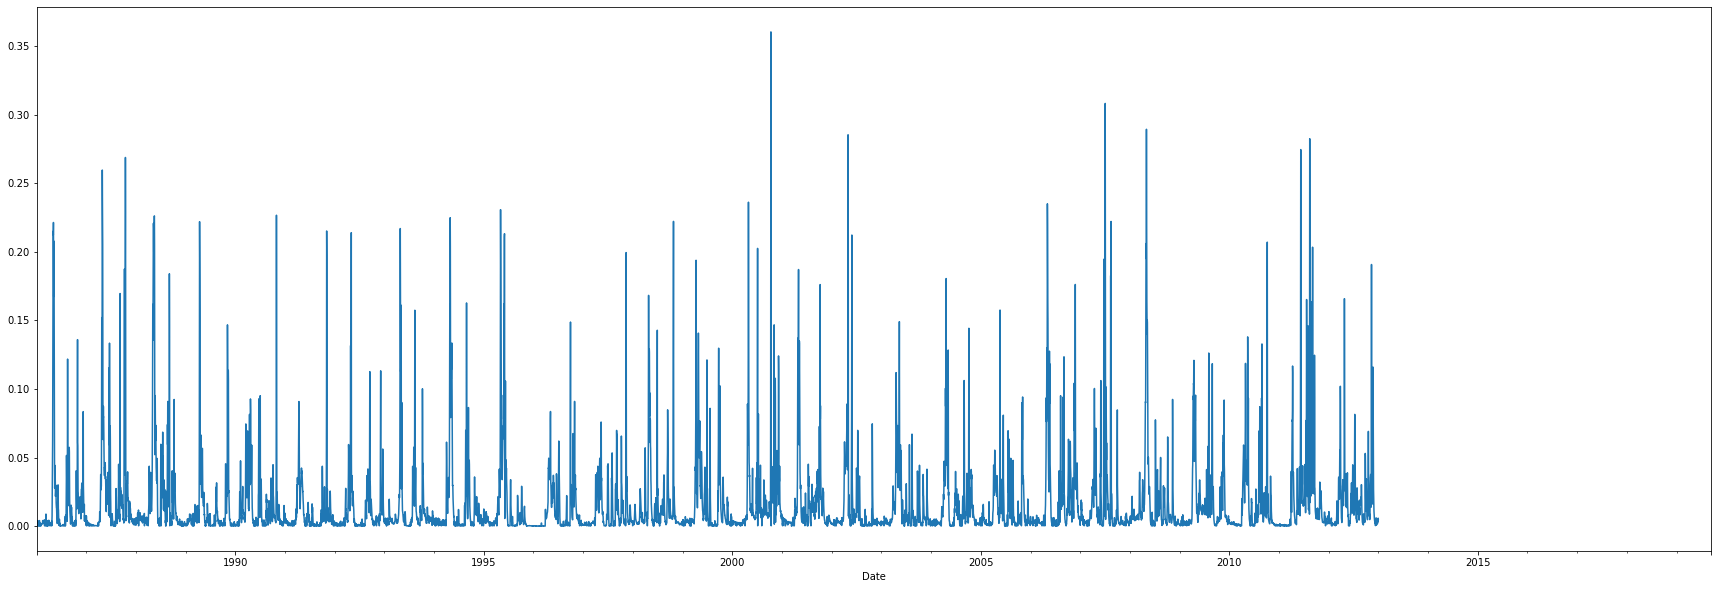

In [7]:
app.var('Observed flow')[()].plot(figsize=(30, 10))

<AxesSubplot:xlabel='Date'>

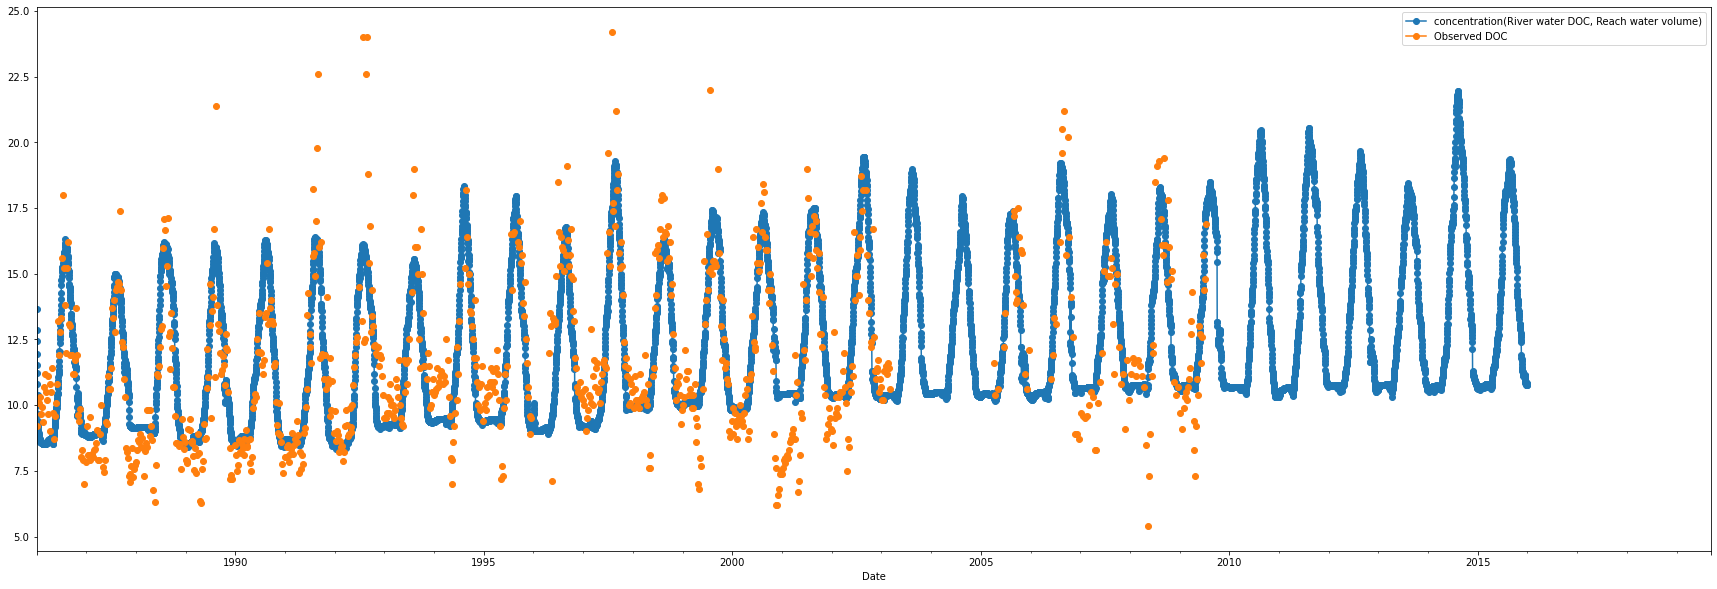

In [27]:
app.start_date[()] = '1986-1-1'
app.run()
pd.concat([app.river.water.oc.conc()['One'], app.var('Observed DOC')[()]], axis=1).plot(figsize=(30, 10), marker='o')